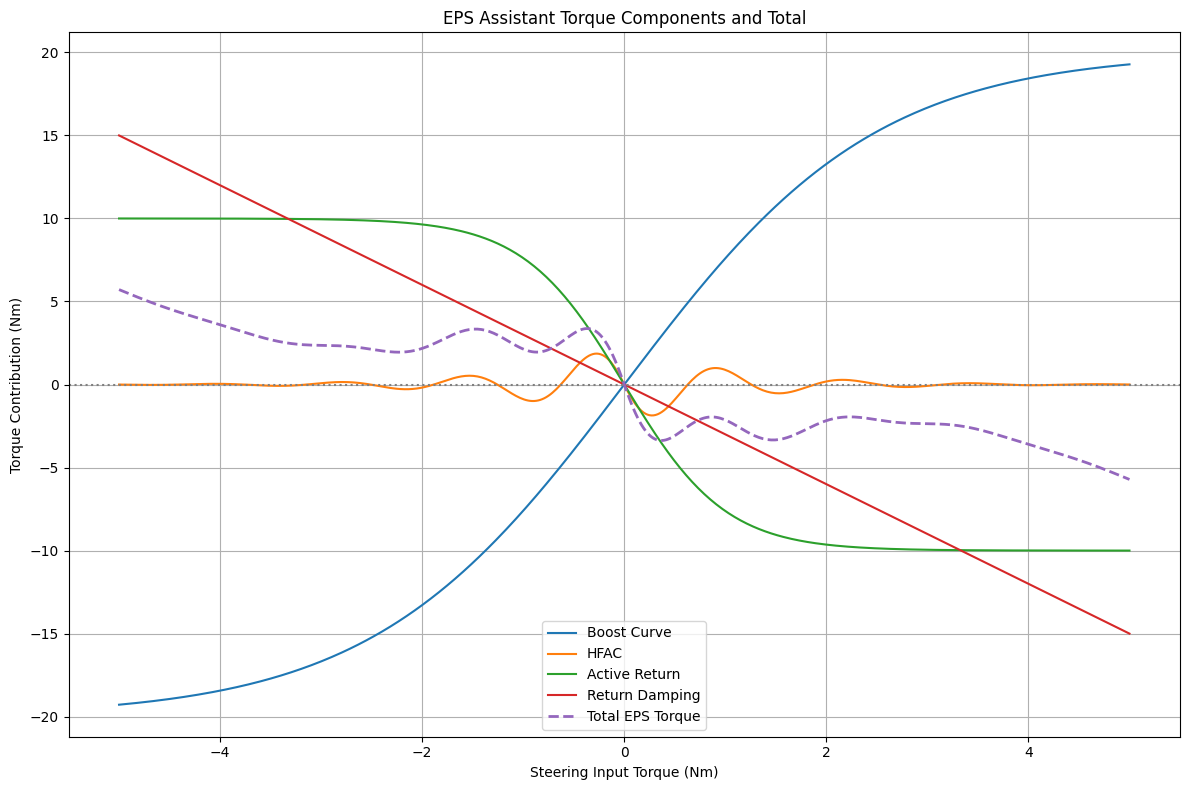

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Simulated input: steering torque from driver (Nm)
steering_input = np.linspace(-5, 5, 500)  # Range from left to right turn

# ---------------------- EPS Components ---------------------- #

# Boost Curve: More assist near center, less at high torque
def boost_curve(input_torque):
    return 20 * np.tanh(0.4 * input_torque)

# HFAC: Small oscillation damping (AI-like pattern recognition)
def hfac(input_torque):
    return -2.5 * np.sin(5 * input_torque) * np.exp(-np.abs(input_torque))

# Active Return Control: Helps center steering after turning
def active_return(input_torque):
    return -10 * np.tanh(input_torque)

# Return Damping: Resistance to fast steering return
def return_damping(input_torque):
    return -3 * input_torque

# ---------------------- Total EPS Torque ---------------------- #

boost = boost_curve(steering_input)
hfac_val = hfac(steering_input)
arc = active_return(steering_input)
damping = return_damping(steering_input)

total_eps_torque = boost + hfac_val + arc + damping

# ---------------------- Visualization ---------------------- #

plt.figure(figsize=(12, 8))
plt.plot(steering_input, boost, label='Boost Curve')
plt.plot(steering_input, hfac_val, label='HFAC')
plt.plot(steering_input, arc, label='Active Return')
plt.plot(steering_input, damping, label='Return Damping')
plt.plot(steering_input, total_eps_torque, label='Total EPS Torque', linewidth=2, linestyle='--')

plt.axhline(0, color='gray', linestyle=':')
plt.title('EPS Assistant Torque Components and Total')
plt.xlabel('Steering Input Torque (Nm)')
plt.ylabel('Torque Contribution (Nm)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
